In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the dataset
df_ev = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df_ev.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [ ]:
#Shape of dataset
df_ev.shape

(177866, 17)

In [ ]:
#Checking the columns
df_ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
#Checking the null value
df_ev.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [ ]:
#Statistical description
df_ev.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [ ]:
#Fillin the missing value
df_ev['Postal Code'].fillna(df_ev['Postal Code'].mean(), inplace=True)

df_ev['County'].fillna(df_ev['County'].mode()[0], inplace=True)
df_ev['City'].fillna(df_ev['City'].mode()[0], inplace=True)
df_ev['Vehicle Location'].fillna('Unknown', inplace=True)
df_ev['Model'].fillna('Unknown', inplace=True)

df_ev['Legislative District'].fillna(df_ev['Legislative District'].median(), inplace=True)

df_ev['Electric Utility'].fillna(df_ev['Electric Utility'].mode()[0], inplace=True)

df_ev['2020 Census Tract'].fillna(df_ev['2020 Census Tract'].mean(), inplace=True)

In [ ]:
#Checking the null value
df_ev.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

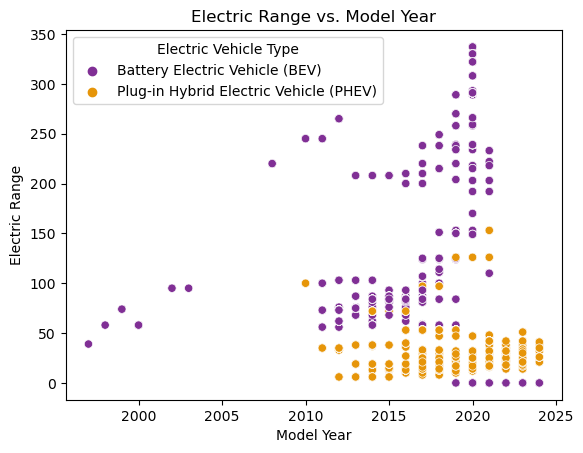

In [ ]:
#Scatterplot
sns.scatterplot(data=df_ev, x='Model Year', y='Electric Range',hue='Electric Vehicle Type',palette='CMRmap')
plt.title('Electric Range vs. Model Year')
plt.show()

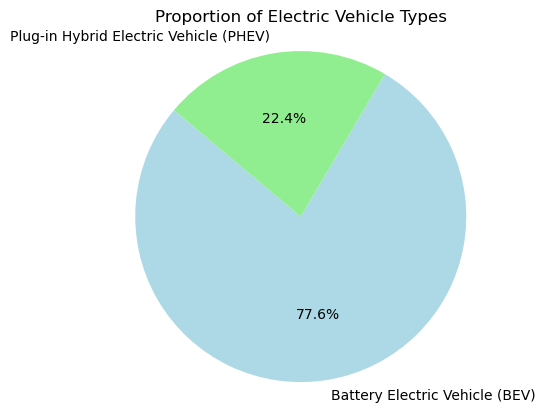

In [ ]:
# Calculate the count of each electric vehicle type
electric_vehicle_counts = df_ev['Electric Vehicle Type'].value_counts()

# Define custom colors for each slice
colors = ['lightblue', 'lightgreen']

# Create a pie plot
plt.pie(electric_vehicle_counts, labels=electric_vehicle_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Electric Vehicle Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

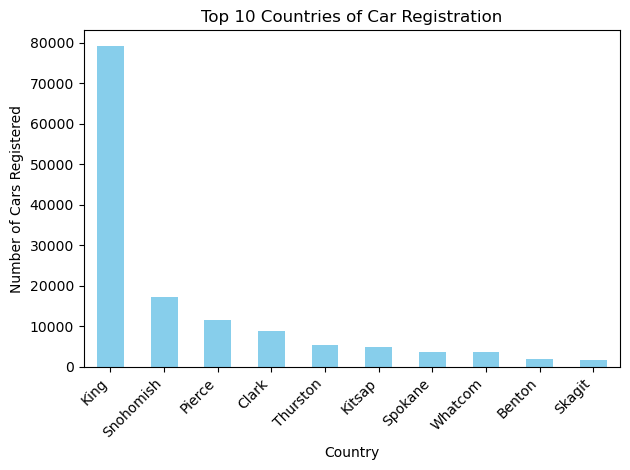

In [ ]:
# Get the top 10 countries
top_10_countries = df_ev['County'].value_counts().head(10)

# Create a bar plot
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries of Car Registration')
plt.xlabel('Country')
plt.ylabel('Number of Cars Registered')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

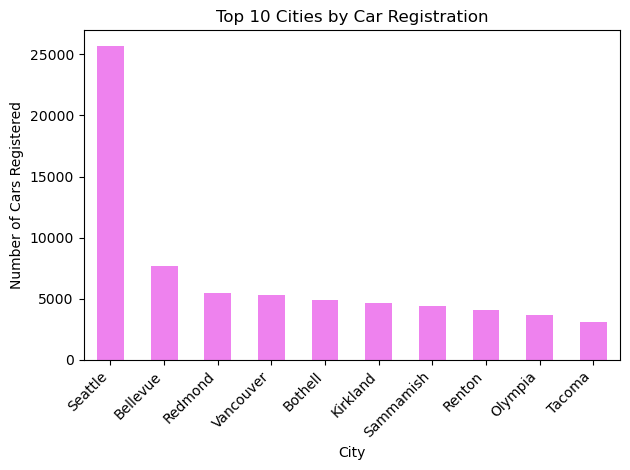

In [ ]:
# Get the top 10 cities
top_10_cities = df_ev['City'].value_counts().head(10)

# Create a bar plot for top 10 cities
top_10_cities.plot(kind='bar', color='violet')
plt.title('Top 10 Cities by Car Registration')
plt.xlabel('City')
plt.ylabel('Number of Cars Registered')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


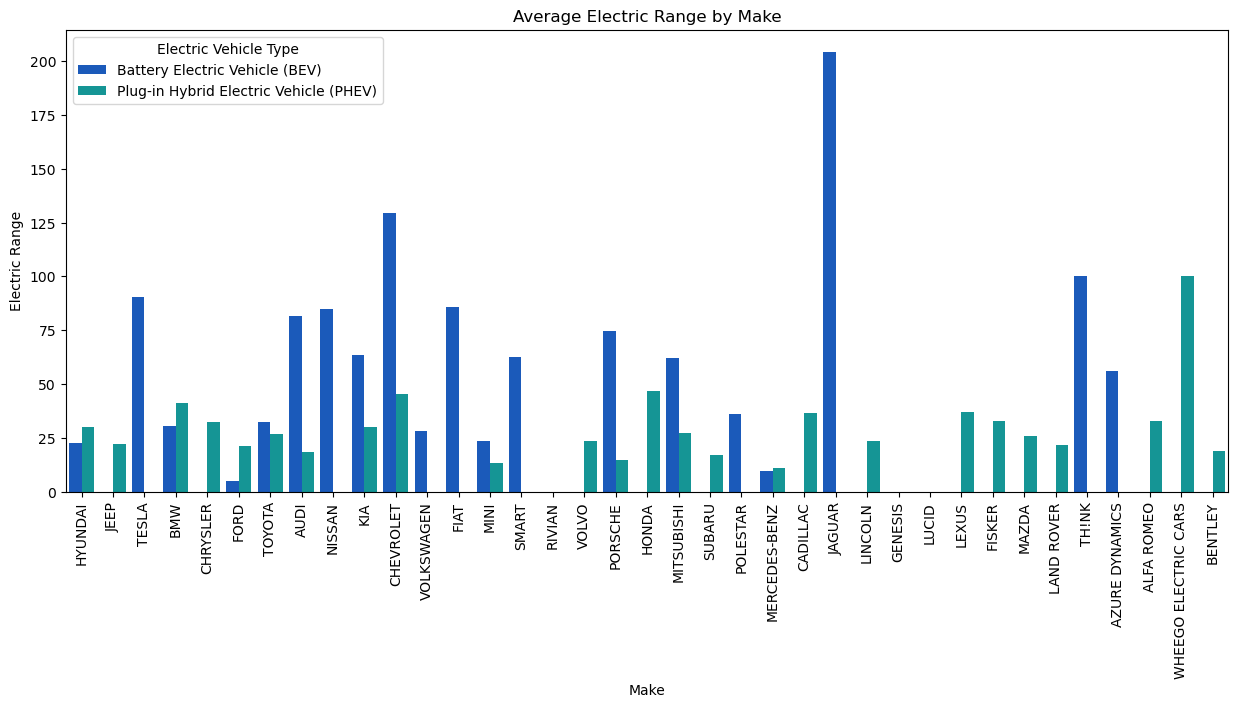

In [ ]:
#Barplot for Make and Electric Range
plt.figure(figsize=(15, 6))
sns.barplot(data=df_ev, x='Make', y='Electric Range', ci=None,hue='Electric Vehicle Type',palette='winter')
plt.title('Average Electric Range by Make')
plt.xticks(rotation=90)
plt.show()

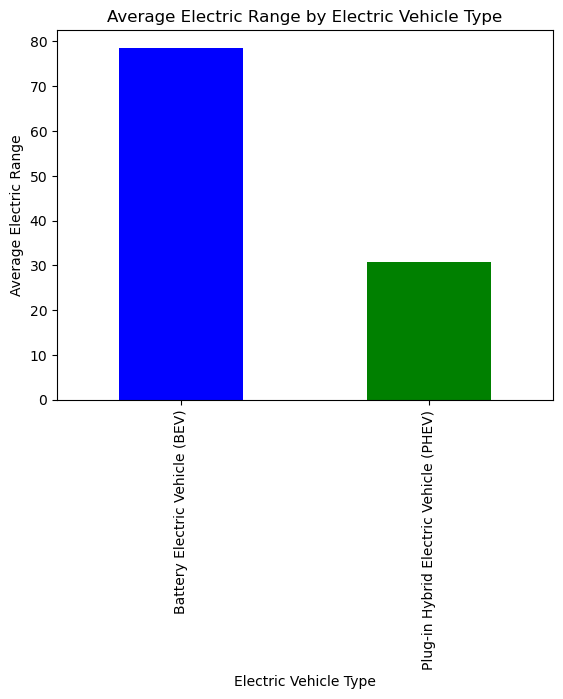

In [ ]:
# Group data by electric vehicle type and calculate average electric range
avg_range_by_type = df_ev.groupby('Electric Vehicle Type')['Electric Range'].mean()

# Plot average electric range by type (bar chart)
avg_range_by_type.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Average Electric Range')
plt.title('Average Electric Range by Electric Vehicle Type')
plt.show()

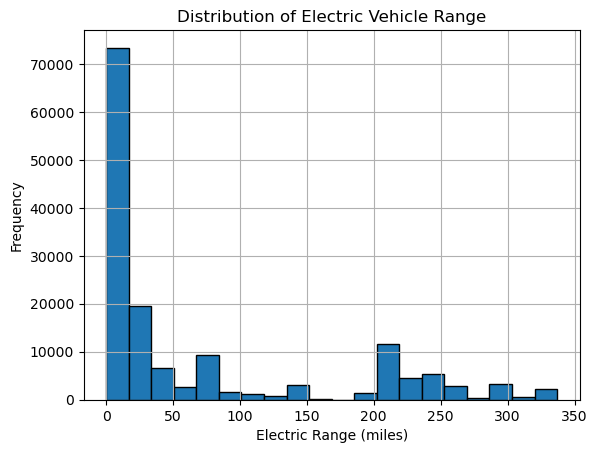

In [ ]:
#Histplot for Electric Range
plt.hist(df_ev['Electric Range'], bins=20, edgecolor='black')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Vehicle Range')
plt.grid(True)
plt.show()

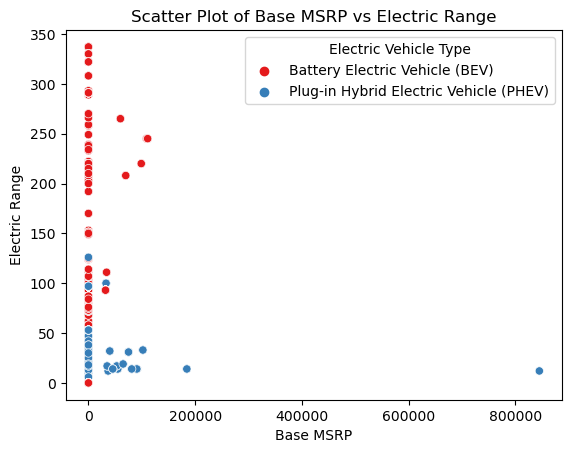

In [ ]:
# Create a scatter plot with hue
sns.scatterplot(data=df_ev, x='Base MSRP', y='Electric Range', hue='Electric Vehicle Type',palette='Set1')
plt.title('Scatter Plot of Base MSRP vs Electric Range')
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range')
plt.legend(title='Electric Vehicle Type', loc='upper right')
plt.show()

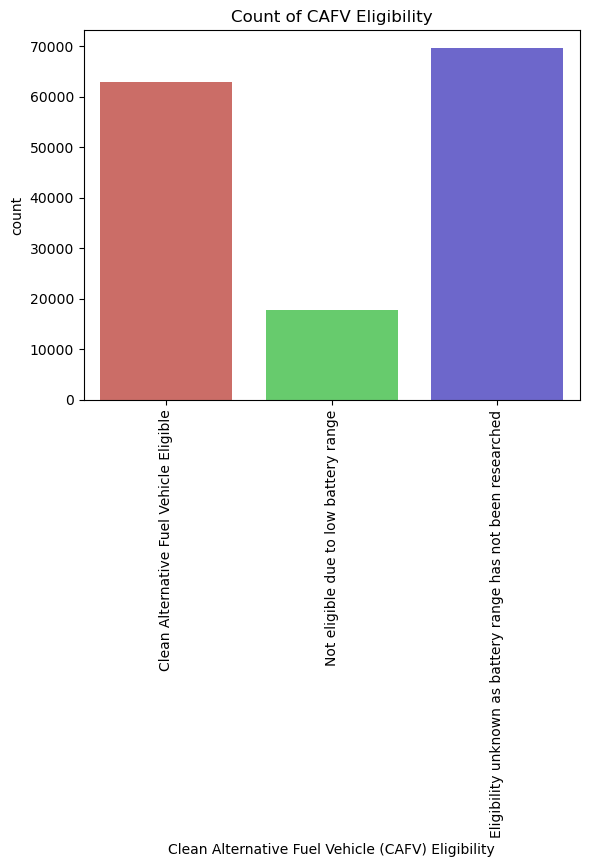

In [ ]:
#Countplot
sns.countplot(data=df_ev, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',palette='hls')
plt.title('Count of CAFV Eligibility')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Drop unnecessary columns like 'VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', and '2020 Census Tract'
df_ev.drop(columns=['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract'], inplace=True)

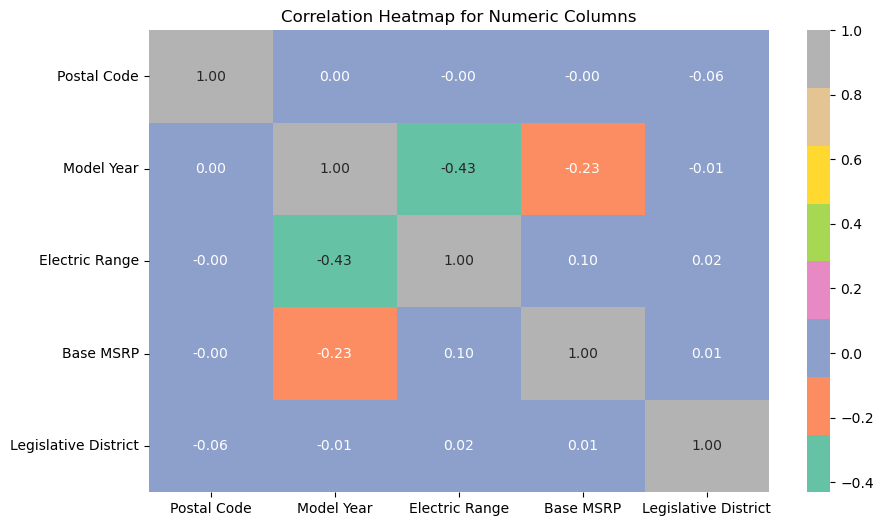

In [ ]:
# Filter numeric columns
numeric_cols = df_ev.select_dtypes(include=['int', 'float']).columns

# Calculate the correlation matrix for numeric columns
numeric_corr = df_ev[numeric_cols].corr()

# Create a heatmap for numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_corr, annot=True, cmap='Set2', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

In [ ]:
df_ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 13 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             150482 non-null  object 
 1   City                                               150482 non-null  object 
 2   State                                              150482 non-null  object 
 3   Postal Code                                        150482 non-null  float64
 4   Model Year                                         150482 non-null  int64  
 5   Make                                               150482 non-null  object 
 6   Model                                              150482 non-null  object 
 7   Electric Vehicle Type                              150482 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  150482 non-null  object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column separately
df_ev['County'] = label_encoder.fit_transform(df_ev['County'])
df_ev['City'] = label_encoder.fit_transform(df_ev['City'])
df_ev['State'] = label_encoder.fit_transform(df_ev['State'])
df_ev['Make'] = label_encoder.fit_transform(df_ev['Make'])
df_ev['Model'] = label_encoder.fit_transform(df_ev['Model'])
df_ev['Electric Vehicle Type'] = label_encoder.fit_transform(df_ev['Electric Vehicle Type'])
df_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = label_encoder.fit_transform(df_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
df_ev['Electric Utility'] = label_encoder.fit_transform(df_ev['Electric Utility'])

# Display the DataFrame with encoded categorical columns
print(df_ev.head())


   County  City  State  Postal Code  Model Year  Make  Model  \
0      77   537     39      98103.0        2020    13     68   
1      77    57     39      98011.0        2022    15     53   
2     180   679     39      98908.0        2023    15     53   
3      77   289     39      98034.0        2018    31     72   
4     165   424     39      98501.0        2018     4     59   

   Electric Vehicle Type  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                      0                                                  0   
1                      1                                                  2   
2                      1                                                  2   
3                      0                                                  0   
4                      1                                                  0   

   Electric Range  Base MSRP  Legislative District  Electric Utility  
0             258          0                  43.0                57 

In [ ]:
# Split the data into features and target
X = df_ev.drop('Electric Vehicle Type', axis=1)
y = df_ev['Electric Vehicle Type']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest - Precision:", rf_precision)
print("Random Forest - Recall:", rf_recall)
print("Random Forest - F1 Score:", rf_f1)

Random Forest - Accuracy: 0.9999667740970861
Random Forest - Precision: 0.9999667755174213
Random Forest - Recall: 0.9999667740970861
Random Forest - F1 Score: 0.9999667732132372


In [ ]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

print("Decision Tree - Accuracy:", dt_accuracy)
print("Decision Tree - Precision:", dt_precision)
print("Decision Tree - Recall:", dt_recall)
print("Decision Tree - F1 Score:", dt_f1)


Decision Tree - Accuracy: 0.9999003222912582
Decision Tree - Precision: 0.9999003350731829
Decision Tree - Recall: 0.9999003222912582
Decision Tree - F1 Score: 0.9999003143348174


In [ ]:
# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM - Accuracy:", svm_accuracy)
print("SVM - Precision:", svm_precision)
print("SVM - Recall:", svm_recall)
print("SVM - F1 Score:", svm_f1)


SVM - Accuracy: 0.779180649234143
SVM - Precision: 0.7390275838148214
SVM - Recall: 0.779180649234143
SVM - F1 Score: 0.6921167814161481


In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best model for prediction
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print("Random Forest (Tuned) - Accuracy:", accuracy_tuned)
print("Random Forest (Tuned) - Precision:", precision_tuned)
print("Random Forest (Tuned) - Recall:", recall_tuned)
print("Random Forest (Tuned) - F1 Score:", f1_tuned)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest (Tuned) - Accuracy: 0.9999335481941721
Random Forest (Tuned) - Precision: 0.9999335481941721
Random Forest (Tuned) - Recall: 0.9999335481941721
Random Forest (Tuned) - F1 Score: 0.9999335481941721


In [ ]:
# Define parameter grid
param_grid = {
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best model for prediction
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)
y_pred_tuned = best_dt_model.predict(X_test)

# Evaluate the tuned model
accuracy_tuned_dt = accuracy_score(y_test, y_pred_tuned)
precision_tuned_dt = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned_dt = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned_dt = f1_score(y_test, y_pred_tuned, average='weighted')

print("Decision Tree (Tuned) - Accuracy:", accuracy_tuned_dt)
print("Decision Tree (Tuned) - Precision:", precision_tuned_dt)
print("Decision Tree (Tuned) - Recall:", recall_tuned_dt)
print("Decision Tree (Tuned) - F1 Score:", f1_tuned_dt)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree (Tuned) - Accuracy: 0.9999003222912582
Decision Tree (Tuned) - Precision: 0.9999003201757977
Decision Tree (Tuned) - Recall: 0.9999003222912582
Decision Tree (Tuned) - F1 Score: 0.9999003196397114


In [ ]:
!pip install scikeras


In [ ]:
# Define model parameters
max_len = X_train.shape[1]
num_classes = len(y_train.unique())
embedding_dim = 32
num_heads = 2
ffn_units = 64
dropout_rate = 0.1

# Define the Transformer model
vocab_size = X_train.max().max() + 1
# Define the Transformer model
inputs = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=int(vocab_size), output_dim=embedding_dim)(inputs)  # Ensure vocab_size is converted to an integer
transformer_layer = MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)
x = transformer_layer(embedding_layer, embedding_layer)
x = Dropout(dropout_rate)(x)
x = LayerNormalization(epsilon=1e-6)(x)
x = Dense(ffn_units, activation='relu')(x)
x = Dense(embedding_dim)(x)
x = Dropout(dropout_rate)(x)
x = LayerNormalization(epsilon=1e-6)(x)
x = GlobalAveragePooling1D()(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs= 3, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = [tf.argmax(pred).numpy() for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Transformer Network - Accuracy:", accuracy)
print("Transformer Network - Precision:", precision)
print("Transformer Network - Recall:", recall)
print("Transformer Network - F1 Score:", f1)

Epoch 1/3
3386/3386 [==============================] - 2415s 712ms/step - loss: 0.0150 - accuracy: 0.9947 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 2/3
3386/3386 [==============================] - 3174s 937ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0012 - val_accuracy: 0.9996
Epoch 3/3
941/941 [==============================] - 3s 3ms/step
Transformer Network - Accuracy: 0.9993687078446357
Transformer Network - Precision: 0.9993692674446286
Transformer Network - Recall: 0.9993687078446357
Transformer Network - F1 Score: 0.9993688588119479


In [ ]:
# Define Capsule layer
class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        assert len(input_shape) >= 3
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]
        self.W = self.add_weight(shape=[1, self.input_num_capsule, self.num_capsule, self.input_dim_capsule, self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        # Expand dimensions to match the shape for matrix multiplication
        u_vecs_expand = tf.expand_dims(tf.expand_dims(u_vecs, -2), -2)
        u_hat_vecs = tf.tile(u_vecs_expand, [1, 1, self.num_capsule, 1, 1])

        # Perform matrix multiplication
        u_hat_vecs = tf.matmul(u_hat_vecs, self.W)

        # Initialize the routing logits to zeros
        b = tf.zeros([tf.shape(u_hat_vecs)[0], self.input_num_capsule, self.num_capsule, 1, 1])

        # Routing algorithm
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=2)
            s = tf.reduce_sum(tf.multiply(c, u_hat_vecs), axis=1, keepdims=True)
            v = self.squash(s)
            b += tf.reduce_sum(tf.multiply(u_hat_vecs, v), axis=-1, keepdims=True)

        return tf.squeeze(v, axis=1)

    def squash(self, vectors):
        squared_norm = tf.reduce_sum(tf.square(vectors), axis=-1, keepdims=True)
        safe_norm = tf.sqrt(squared_norm + tf.keras.backend.epsilon())
        squash_factor = squared_norm / (1. + squared_norm)
        unit_vectors = vectors / safe_norm
        return squash_factor * unit_vectors

# Create Capsule Network model
def create_capsule_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model parameters
max_len = X_train.shape[1]
embedding_dim = 1  # Adjust embedding dimension according to your data
num_classes = len(np.unique(y_train))

# Create Capsule Network model
model = create_capsule_model((max_len, embedding_dim), num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Capsule Network - Accuracy:", accuracy)
print("Capsule Network - Precision:", precision)
print("Capsule Network - Recall:", recall)
print("Capsule Network - F1 Score:", f1)





Epoch 1/5
3386/3386 [==============================] - 52s 15ms/step - loss: 0.1309 - accuracy: 0.9536 - val_loss: 0.0578 - val_accuracy: 0.9769
Epoch 2/5
3386/3386 [==============================] - 35s 10ms/step - loss: 0.0559 - accuracy: 0.9786 - val_loss: 0.0358 - val_accuracy: 0.9883
Epoch 3/5
3386/3386 [==============================] - 35s 10ms/step - loss: 0.0270 - accuracy: 0.9888 - val_loss: 0.0258 - val_accuracy: 0.9883
Epoch 4/5
3386/3386 [==============================] - 37s 11ms/step - loss: 0.0281 - accuracy: 0.9864 - val_loss: 0.0291 - val_accuracy: 0.9813
Epoch 5/5
941/941 [==============================] - 4s 4ms/step
Capsule Network - Accuracy: 0.9896667441937734
Capsule Network - Precision: 0.9896442213631956
Capsule Network - Recall: 0.9896667441937734
Capsule Network - F1 Score: 0.9896352865510691


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikeras.wrappers import KerasClassifier

# Define Capsule layer
class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        assert len(input_shape) >= 3
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]
        self.W = self.add_weight(shape=[1, self.input_num_capsule, self.num_capsule, self.input_dim_capsule, self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        # Expand dimensions to match the shape for matrix multiplication
        u_vecs_expand = tf.expand_dims(tf.expand_dims(u_vecs, -2), -2)
        u_hat_vecs = tf.tile(u_vecs_expand, [1, 1, self.num_capsule, 1, 1])

        # Perform matrix multiplication
        u_hat_vecs = tf.matmul(u_hat_vecs, self.W)

        # Initialize the routing logits to zeros
        b = tf.zeros([tf.shape(u_hat_vecs)[0], self.input_num_capsule, self.num_capsule, 1, 1])

        # Routing algorithm
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=2)
            s = tf.reduce_sum(tf.multiply(c, u_hat_vecs), axis=1, keepdims=True)
            v = self.squash(s)
            b += tf.reduce_sum(tf.multiply(u_hat_vecs, v), axis=-1, keepdims=True)

        return tf.squeeze(v, axis=1)

    def squash(self, vectors):
        squared_norm = tf.reduce_sum(tf.square(vectors), axis=-1, keepdims=True)
        safe_norm = tf.sqrt(squared_norm + tf.keras.backend.epsilon())
        squash_factor = squared_norm / (1. + squared_norm)
        unit_vectors = vectors / safe_norm
        return squash_factor * unit_vectors

# Create Capsule Network model
def create_capsule_model(num_capsule, dim_capsule, routings):
    inputs = layers.Input(shape=(max_len, embedding_dim))
    x = layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = CapsuleLayer(num_capsule=num_capsule, dim_capsule=dim_capsule, routings=routings)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrapper function for Capsule Network model
def create_capsule_model_wrapper():
    num_capsule = 10  # Set  desired values here
    dim_capsule = 16  # Set  desired values here
    routings = 3  # Set  desired values here
    return create_capsule_model(num_capsule, dim_capsule, routings)


# Define model parameters
max_len = X_train.shape[1]
embedding_dim = 1  # Adjust embedding dimension according to  data
num_classes = len(np.unique(y_train))

# Create Capsule Network model
capsule_model = KerasClassifier(build_fn=create_capsule_model_wrapper, verbose=0)

# Parameter grid for grid search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=capsule_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV instance
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy_gs_cn = accuracy_score(y_test, y_pred)
precision_gs_cn = precision_score(y_test, y_pred, average='weighted')
recall_gs_cn = recall_score(y_test, y_pred, average='weighted')
f1_gs_cn = f1_score(y_test, y_pred, average='weighted')

print("Best Model - Accuracy:", accuracy_gs_cn)
print("Best Model - Precision:", precision_gs_cn)
print("Best Model - Recall:", recall_gs_cn)
print("Best Model - F1 Score:", f1_gs_cn)



Best Parameters: {'optimizer': 'adam'}
Best Score: 0.9741910821866493
Best Model - Accuracy: 0.9893012592617204
Best Model - Precision: 0.9893408627126168
Best Model - Recall: 0.9893012592617204
Best Model - F1 Score: 0.989316532359311
